<a href="https://colab.research.google.com/github/nethajisubash/AI-ML-Projects/blob/main/IdenitfySpoilerReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#------------
#   Steps
#------------
#  Understand how kageel GOU works - https://www.youtube.com/watch?v=c9PL5RXyfU4
#      Move this to Kaggle otebook (one you get to the model fit)
#      Select memory and T4 machine config.
#1. Access Data
#     Download into google colab session
# 2. EDA
#     understanding
#     Visulization
#     Get it into a shape for ML and DL
# 3. Pre-processing
#     Data cleaning
#     D
#     80 /20 on traing and test data
# 4. Model
#     Get model from hugging face
#     Tune it to use with your need and data
#     Create new model
# 5. Performance
#      Test with test data.
# 6. Iterate
#    diff model
#    Diff tune-in
#    Performance improve?

Downloading...
From (original): https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z
From (redirected): https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z&confirm=t&uuid=d02c88f7-a54c-4c3d-9dc1-81415f354854
To: /content/dataset/imdb_spoiler/imdb_spoiler_dataset.zip
100%|██████████| 348M/348M [00:06<00:00, 51.8MB/s]


In [ ]:
import os
import gdown
import zipfile
import google.colab.files

zip_url = "https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z"

dataset_path = os.path.join("./dataset", "imdb_spoiler")
zip_file_path = os.path.join(dataset_path, "imdb_spoiler_dataset.zip")

if not os.path.exists(dataset_path):
   os.makedirs(dataset_path)

if not os.path.exists(zip_file_path):
   gdown.download(zip_url, zip_file_path, quiet=False)

with zipfile.ZipFile(zip_file_path ,"r") as zip_ref:
   zip_ref.extractall(dataset_path)

In [2]:
import pandas as pd
dfm = pd.read_json(os.path.join(dataset_path, "IMDB_movie_details.json"), lines=True)
dfr = pd.read_json(os.path.join(dataset_path, "IMDB_reviews.json"), lines=True)

In [3]:
dfm.shape

(1572, 7)

In [4]:
dfr.shape

(573913, 7)

In [5]:
dfm.columns

Index(['movie_id', 'plot_summary', 'duration', 'genre', 'rating',
       'release_date', 'plot_synopsis'],
      dtype='object')

In [6]:
dfr.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating', 'review_summary'],
      dtype='object')

In [7]:
dfm.dtypes

,0
movie_id,object
plot_summary,object
duration,object
genre,object
rating,float64
release_date,object
plot_synopsis,object


In [8]:
dfr.dtypes

,0
review_date,object
movie_id,object
user_id,object
is_spoiler,bool
review_text,object
rating,int64
review_summary,object


In [9]:
dfr.notnull().sum()

,0
review_date,573913
movie_id,573913
user_id,573913
is_spoiler,573913
review_text,573913
rating,573913
review_summary,573913


In [10]:
dfm.notnull().sum()

,0
movie_id,1572
plot_summary,1572
duration,1572
genre,1572
rating,1572
release_date,1572
plot_synopsis,1572


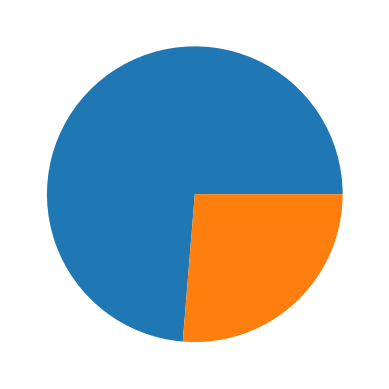

In [11]:
#how many spoilers there.
import matplotlib.pyplot as plt
plt.pie(dfr['is_spoiler'].value_counts())
plt.show()

In [19]:
One_2_Many  = pd.merge(dfm, dfr, on='movie_id', how='left')
count_o2m = One_2_Many.groupby('movie_id').size().reset_index(name='count')
count_o2m

,movie_id,count
0,tt0012349,104
1,tt0015864,128
2,tt0017136,337
3,tt0017925,192
4,tt0018455,178
...,...,...
1567,tt6048596,75
1568,tt6294822,11
1569,tt6868216,13
1570,tt7608418,39


,movie_id,count
0,tt0012349,104
1,tt0015864,128
2,tt0017136,337
3,tt0017925,192
4,tt0018455,178
...,...,...
1567,tt6048596,75
1568,tt6294822,11
1569,tt6868216,13
1570,tt7608418,39
